From https://lscsoft.docs.ligo.org/bilby/compact-binary-coalescence-parameter-estimation.html

In [1]:
import bilby
import matplotlib.pyplot as plt

In [2]:
duration = 4
sampling_frequency = 2048
outdir = "visualising_the_results"
label = "example"

injection_parameters = dict(
    mass_1=36.0,
    mass_2=29.0,
    a_1=0.4,
    a_2=0.3,
    tilt_1=0.5,
    tilt_2=1.0,
    phi_12=1.7,
    phi_jl=0.3,
    luminosity_distance=1000.0,
    theta_jn=0.4,
    phase=1.3,
    ra=1.375,
    dec=-1.2108,
    geocent_time=1126259642.413,
    psi=2.659,
)

In [3]:
# specify waveform arguments
waveform_arguments = dict(
    waveform_approximant="IMRPhenomXP",  # waveform approximant name
    reference_frequency=50.0,  # gravitational waveform reference frequency (Hz)
)

# set up the waveform generator
waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    sampling_frequency=sampling_frequency,
    duration=duration,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameters=injection_parameters,
    waveform_arguments=waveform_arguments,
)

21:24 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [4]:
ifos = bilby.gw.detector.InterferometerList(["H1", "L1"])
ifos.set_strain_data_from_power_spectral_densities(
    duration=duration,
    sampling_frequency=sampling_frequency,
    start_time=injection_parameters["geocent_time"] - 2,
)
_ = ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters
)

/Users/benjzhao/.conda/envs/igwn-py310/lib/python3.10/site-packages/bilby/gw/source.py:528: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
21:24 bilby INFO    : Injected signal in H1:
21:24 bilby INFO    :   optimal SNR = 23.78
21:24 bilby INFO    :   matched filter SNR = 23.49-1.32j
21:24 bilby INFO    :   mass_1 = 36.0
21:24 bilby INFO    :   mass_2 = 29.0
21:24 bilby INFO    :   a_1 = 0.4
21:24 bilby INFO    :   a_2 = 0.3
21:24 bilby INFO    :   tilt_1 = 0.5
21

In [5]:
# first, set up all priors to be equal to a delta function at their designated value
priors = bilby.gw.prior.BBHPriorDict(injection_parameters.copy())
# then, reset the priors on the masses and luminosity distance to conduct a search over these parameters
priors["mass_1"] = bilby.core.prior.Uniform(25, 40, "mass_1")
priors["mass_2"] = bilby.core.prior.Uniform(25, 40, "mass_2")
priors["luminosity_distance"] = bilby.core.prior.Uniform(
    400, 2000, "luminosity_distance"
)

In [6]:
# compute the likelihoods
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator
)

In [7]:
result = bilby.core.sampler.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler="dynesty",
    nlive=300,
    dlogz=0.1,
    npool=10,
    injection_parameters=injection_parameters,
    outdir=outdir,
    label=label,
    sample="rwalk",
)

21:27 bilby INFO    : Running for label 'example', output will be saved to 'visualising_the_results'
21:27 bilby INFO    : Using lal version 7.4.1
21:27 bilby INFO    : Using lal git version Branch: None;Tag: lal-v7.4.1;Id: 9db6ea3931cdba13c059efff823819485a11e19a;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
21:27 bilby INFO    : Using lalsimulation version 5.3.1
21:27 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsimulation-v5.3.1;Id: 7641025aeea9828357c9454ee39030c519af895b;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
21:27 bilby INFO    : Analysis priors:
21:27 bilby INFO    : mass_1=Uniform(minimum=25, maximum=40, name='mass_1', latex_label='$m_1$', unit=None, boundary=None)
21:27 bilby INFO    : mass_2=Uniform(minimum=25, maximum=40, name='mass_2', latex_label='$m_2$', unit=None, boundary=None)
21:27 bilby INFO    : luminosity_distance=Uniform(minimum=

1it [00:00, ?it/s]

21:27 bilby INFO    : Written checkpoint file visualising_the_results/example_resume.pickle
21:27 bilby INFO    : Starting to close worker pool.
21:27 bilby INFO    : Finished closing worker pool.
21:27 bilby INFO    : Rejection sampling nested samples to obtain 862 posterior samples
21:27 bilby INFO    : Sampling time: 0:00:16.233752
21:27 bilby INFO    : Summary of results:
nsamples: 862
ln_noise_evidence: -8382.796
ln_evidence: -7949.984 +/-  0.170
ln_bayes_factor: 432.812 +/-  0.170



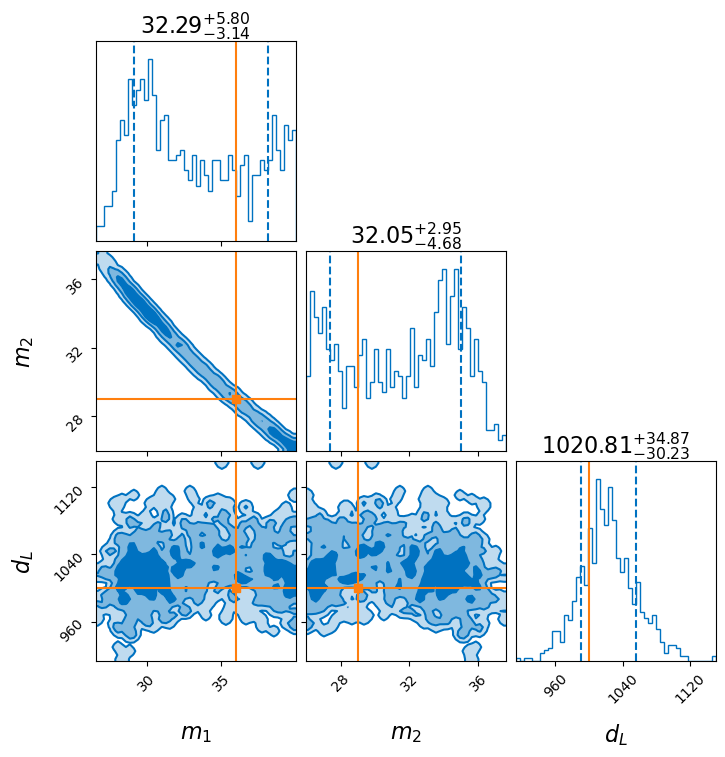

In [8]:
result.plot_corner(save=False)
plt.show()

21:29 bilby INFO    : Generating waveform figure for H1


21:29 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


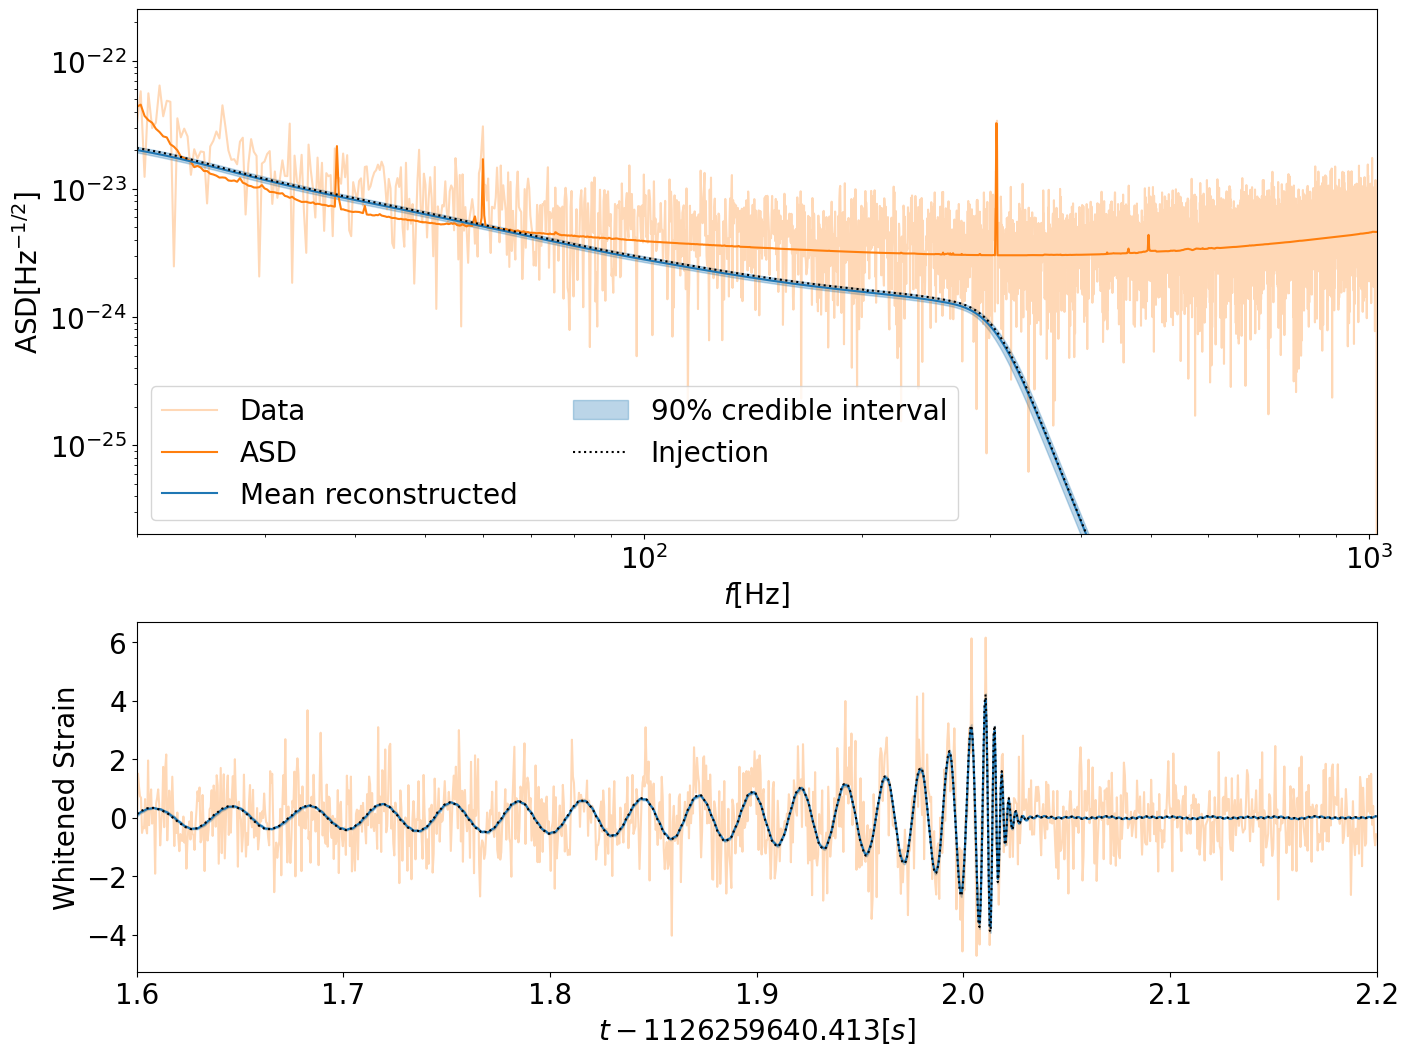

21:29 bilby INFO    : Generating waveform figure for L1
21:29 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


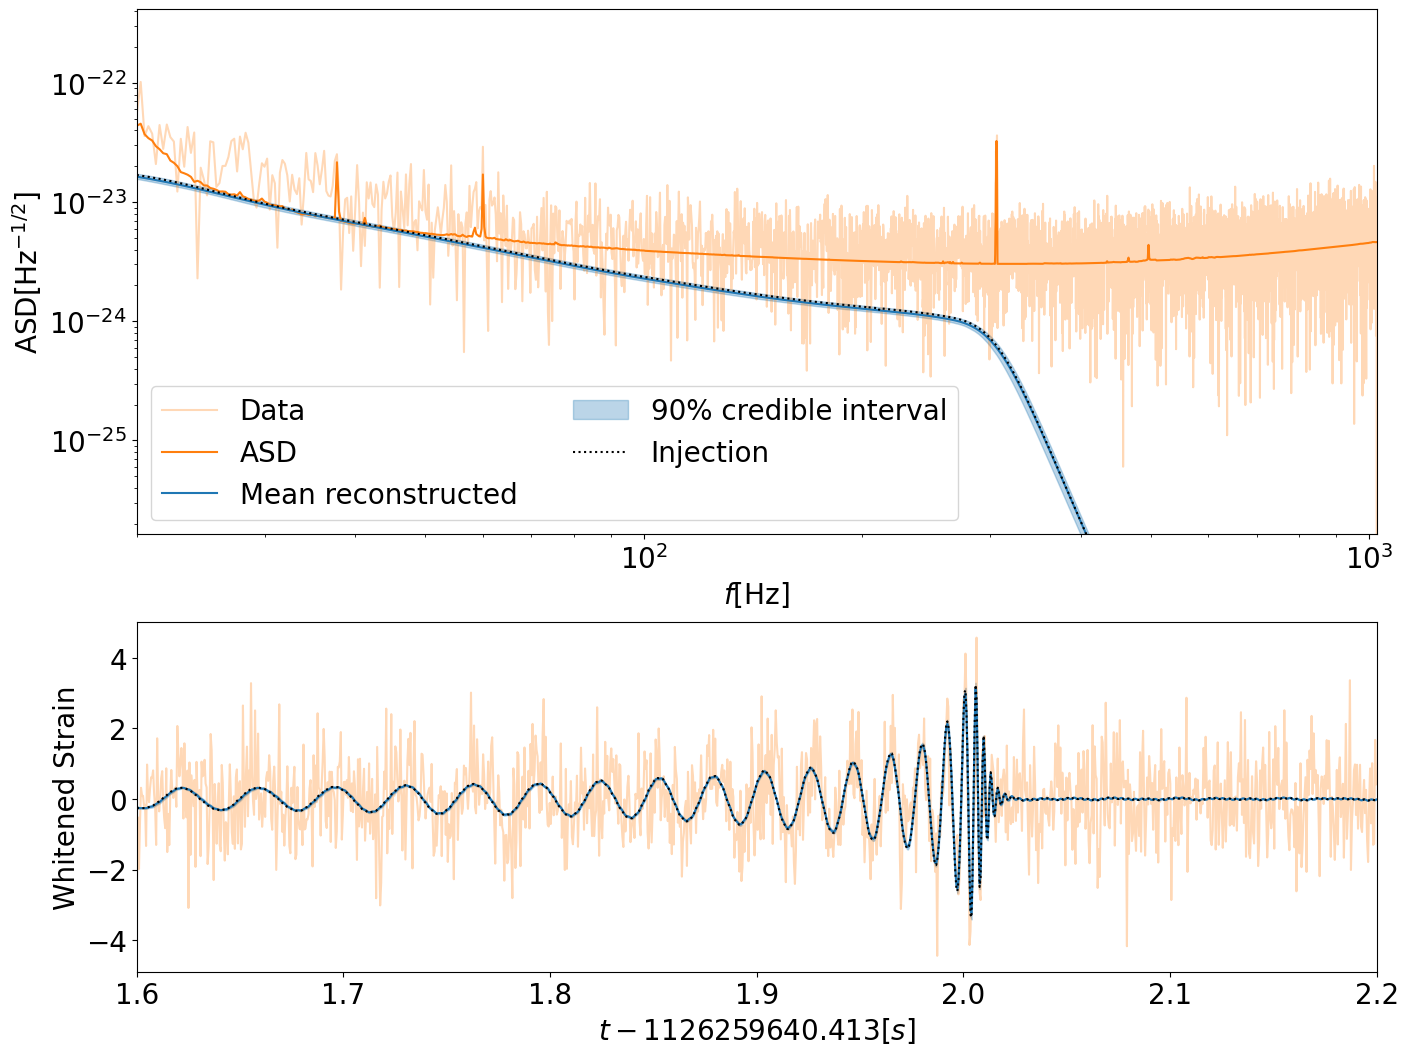

In [9]:
from bilby.gw.result import CBCResult

cbc_result = CBCResult.from_json("visualising_the_results/example_result.json")
for ifo in ifos:
    cbc_result.plot_interferometer_waveform_posterior(
        interferometer=ifo, n_samples=500, save=False
    )
    plt.show()